### for region specific visualzations 
Environment: region_specfic
find all ids belonging to a parent (ie. 315, for isocortex), create mask and visualize using napari

generate average image and multiply with the mask!

NOTE that this environment can not read or write excel!!! installing the openpyxl package will break this environment


In [1]:
import os

import pandas as pd

import numpy as np

import Neuron_analysis as na

import skimage
from skimage import io

import SimpleITK as sitk

import re
from tqdm import tqdm

import napari

import nrrd

In [2]:
def find_mousename(text):
    #finds name of mouse that follows the typical LSENS pattern: two letters followed by 3 numbers, ie AL000
    a= re.search('[a-zA-Z]{2}[0-9]{2,3}', text)
    return a[0]

def isolate_region(this_region):
    
    '''''' 
    
    child_ids= atlas_labels.loc[atlas_labels['structure_id_path'].str.contains(f'/{this_region}/', case=False)].id
    # child_ids

    # find all regions with regionX inside the structure id path
    # for example 315 - isocortex, 985- primary motor region
    
    this_mask= np.zeros(annot_h.shape)
    # create empty array to store the mask
    for i in tqdm(child_ids.values):
        this_mask[annot_h==i]=1
        #loop through all the region id and assign value of 1
    # empty_array now is a matrix of 1 and 0s
    
    return this_mask

def isolate_region_2(regions_list):
    
    '''useful for isolating one layer of multiple region, ie MOs 2/3 and MOp 2/3''' 
    
    #child_ids= atlas_labels.loc[atlas_labels['structure_id_path'].str.contains('|'.join(regions_list), case=False)].id
    # child_ids

    # find all regions with regionX inside the structure id path
    # for example 315 - isocortex, 985- primary motor region
    
    this_mask= np.zeros(annot_h.shape)
    # create empty array to store the mask
    for i in tqdm(regions_list):
        this_mask[annot_h==i]=1
        #loop through all the region id and assign value of 1
    # empty_array now is a matrix of 1 and 0s
    
    return this_mask

def save_tiff(numpystack, outname):
    
    '''save numpy stack as tiff stack and also save sum projections in horizontal, coronal, and saggital views'''
    
    print('Starting to saving tif files..')
    
    #io.imsave(outname+'_axons.tif',numpystack)
    
    sum_0=np.sum(numpystack, axis=0)
    sum_1=np.sum(numpystack, axis=1)
    sum_2=np.sum(numpystack, axis=2)
    io.imsave(outname+ '_sum_0.tif',sum_0,check_contrast=False)
    io.imsave(outname+ '_sum_1.tif',sum_1,check_contrast=False)
    io.imsave(outname+ '_sum_2.tif',sum_2,check_contrast=False)

def save_tiff_mask(numpystack, outname):

    ''' most useful for saving max projection for region masks, to be used as outlines in illustrators
    save numpy stack as png max projections in horizontal, coronal, and saggital views '''

    print('Starting to saving tif files..')

    #io.imsave(outname+'_axons.tif',numpystack)

    sum_0=np.max(numpystack, axis=0)
    #sum_1=np.sum(numpystack, axis=1)
    #sum_2=np.sum(numpystack, axis=2)
    
    io.imsave(outname+ '_max_0.tif',sum_0)
    #io.imsave(outname+ '_max_1.tif',sum_1)
    #io.imsave(outname+ '_max_2.tif',sum_2)

In [5]:
file_name = r'C:/Users/liu/mouse_connectivity/annotation/ccf_2017/annotation_25.nrrd'
data_array, metadata = nrrd.read(file_name)

annot_h=np.moveaxis(data_array, 1, 0)
print('Converted to horizontal atlas with shape', annot_h.shape)
# reslice corontal atlas to horizontal atlas that is consistent with our sample's orientation

atlas_labels=pd.read_csv('D:\Allenbrainatlas\ARA_25_micron_mhd_ccf2017\labels.csv')
#read labels

Converted to horizontal atlas with shape (320, 528, 456)


In [19]:
#np.save('annotation_25.npy', data_array)
# save the annotation file as npy to use in other environment (no need to install nrrd)

### Section to plot masked axons

In [8]:
#viewer = napari.Viewer()

#viewer.add_image(template, name='template')
#viewer.add_labels(annot_h, name='atlas')


Stuff to try

isocortec 315

MOp1, MOs1 [320,656]

MOp 2/3 943,  MOs 2/3 962. [943,962]

MOp5, MOs 5. [648,767]

MOp6a, MOs 6a [844,1021]

MOp6b, MOs 6b [882,1085]


region_dict= {
    '1':[320,656],
    '23':[943,962],
    '5':[648,767],
    '6a':[844,1021],
    '6b':[882,1085]
}

In [9]:
# loop sections
regions=['s1', 's2']
mouse_lines=['ras','scn','tlx','sim','rbp','nts']

In [10]:
# for isolating all regions belonging to one region, ie. isocortex 315, or caudoputamen, 672

outdir= r'D:\viral_results\s1_s2\region\CP'

region_id= [672]
region_mask= isolate_region_2(region_id)
# generate mask outside of the loop since it will be the same!

for i in regions:
    for j in mouse_lines:
        file_path= f'D:\\viral_results\\{i}_average\\{j}_average.npy'

        axons=np.load(file_path)
        axons[0,0,0]=0
        axons[0,1,0]=0
        
        axons_masked= axons*region_mask
        
        out_name= f'{outdir}\\{i}_{j}_avg'
        save_tiff(axons_masked,out_name)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]


Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..
Starting to saving tif files..


In [11]:
out_name

'D:\\viral_results\\s1_s2\\region\\CP\\s2_nts_avg'

In [22]:
# for isolating one layer of multiple region, ie MOs 2/3 and MOp 2/3''' 


region_dict= {
    '1':[320,656],
    '23':[943,962],
    '5':[648,767],
    '6a':[844,1021],
    '6b':[882,1085]
}

In [ ]:
# for isolating one layer of multiple region, ie MOs 2/3 and MOp 2/3''' 

region_id= [320,656]
layer= '1'

# cannot be string to use isolate region2
region_mask= isolate_region_2(region_id)
# generate mask outside of the loop since it will be the same!

#region_id= ['315']
#region_mask= isolate_region(region_id)
# generate mask outside of the loop since it will be the same!

for i in regions:
    for j in mouse_lines:
        file_path= f'D:\\viral_results\\s1_s2\\averages\\{i}_{j}_avg.npy'

        axons=np.load(file_path)
        axons[0,0,0]=0
        axons[0,1,0]=0
        
        axons_masked= axons*region_mask
        
        out_name= f'D:\\viral_results\\s1_s2\\region\\MO\\{layer}_{i}_{j}_avg'
        save_tiff(axons_masked,out_name)


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.51it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\viral_results\\s1_s2\\averages\\s1_ras_avg.npy'

In [4]:
# example section

#axons1= sitk.ReadImage(r'D:\viral_results\s2\AL278_axons.tif')
#axons1=sitk.GetArrayFromImage(axons2) 
# issue with image with 64 bit samples, since the normalized images have values like 10e-5
# hence we work with npy files directly

region='s1'
mouseline='ras'

file_path= f'D:\\viral_results\\s1_s2\\averages\\{region}_{mouseline}_avg.npy'

axons=np.load(file_path)
axons[0,0,0]=0
axons[0,1,0]=0
# dont forget to change the [0,0,0] position from the total number of axons back to 0!
#viewer.add_image(axons)


In [6]:
# for a given mouse line

region_id= ['315']
# can be a list such as region_id= ['943', '962'] , but will have two separate files
# or can be one big region ie. 315 the isocortex wich have multiple child - use isolate_region

for i in region_id: 
    
    #region_mask= isolate_region(i)
    axons_masked= axons*region_mask
    
    out_name= f'D:\\viral_results\\s1_s2\\region\\{i}_{region}_{mouseline}_avg'
    
    save_tiff(axons_masked,out_name)

100%|████████████████████████████████████████████████████████████████████████████████| 374/374 [00:48<00:00,  7.69it/s]


Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_4124\2350469427.py:34: UserWarning: D:\viral_results\s1_s2\region\315_s2_ras_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_4124\2350469427.py:35: UserWarning: D:\viral_results\s1_s2\region\315_s2_ras_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_4124\2350469427.py:36: UserWarning: D:\viral_results\s1_s2\region\315_s2_ras_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


##### plot region mask itself for outlines
not useful..yet?

In [45]:
region_dict= {
    '1':[320,656],
    '23':[943,962],
    '5':[648,767],
    '6a':[844,1021],
    '6b':[882,1085]
}

In [46]:
for key,value in region_dict.items(): 

    region_mask= isolate_region_2(value)
    # generate mask outside of the loop since it will be the same!

    out_name= f'D:\\viral_results\\s1_s2\\region\\MO\\{key}_mask'
    save_tiff_mask(region_mask,out_name)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.17it/s]


Starting to saving tif files..


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.10it/s]


Starting to saving tif files..


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.42it/s]


Starting to saving tif files..


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.17it/s]


Starting to saving tif files..


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.40it/s]


Starting to saving tif files..


### Section to plot contours and find centroid for masked axons

In [4]:
def find_contour_fractionmax(axon_array, fraction):
    
    ''' input axon stack as numpy array and fraction of maximal intensity wish to compute (ie. 0.95)
    returns binary image and contour on horizontal sumprojection'''
    
    horizontal = np.sum(axons_masked,0)
    #io.imshow(horizontal) 
    #io.show()
    # show sum projection in horizontal view
    
    test1= skimage.filters.gaussian(horizontal, sigma=4)
    # apply gaussian filter

    #io.imshow(test1) 
    #io.show()
    # show sum projection in horizontal view
    
    contour1= np.max(test1) * fraction
    threshold1= test1>contour1
    # find 95% of max intensity and threshold

    #io.imshow(threshold1) 
    #io.show()
    
    outline= skimage.segmentation.find_boundaries(threshold1, mode='inner').astype(np.uint8)
    #find outline of the segmentation

    #io.imshow(outline) 
    #io.show()
    
    return threshold1, outline

def find_contour_otsu(axons_array):
    ''' input axon stack as numpy array,apply gaussian filter then threshold using otsu's method
    returns binary image, and contour on horizontal sumprojection'''
        
    horizontal = np.sum(axons_masked,0)
    #io.imshow(horizontal) 
    #io.show()
    # show sum projection in horizontal view

    test1= skimage.filters.gaussian(horizontal, sigma=4)

    thresh = skimage.filters.threshold_otsu(test1)
    binary = test1 > thresh

    outline= skimage.segmentation.find_boundaries(binary, mode='inner').astype(np.uint8)

    label_img = skimage.measure.label(binary)
    region=skimage.measure.regionprops(label_img)
    # measure connected components
    
    return binary, outline

def conv_stereo(ML, AP, realum):
    '''input data points in terms of pixels and real pixel size in micrometers 
    calculates stereotaxic coordinate and return as ML, AP values'''
    bregma= [227.5, 215]
    # bregma coordiantes in horizontal view, where image dimension is [456, 528]
        
    tmpmedlat= abs(bregma[0]-ML)
    tmpantpos=bregma[1]- AP
    
    factor= realum/1000
    medlat=tmpmedlat*factor
    antpos= tmpantpos*factor
    # convert pixels to real micrometers
    
    return round(medlat,2), round(antpos,2)


#### Contour and segmentation centroid for each individual sample
MO axons horizontal sumprojections
95% and 75% Contour on horizontal sum projection and 95% segmentation centroid 
also have areas of 75% contour and sum # of axons within the 95% segmentation

In [5]:
def find_contour_fractionmax2d(axon_array,fraction):
    
        
    ''' input axon stack as 2d numpy array (id, already in horizontal sum projection) and fraction of maximal intensity wish to compute (ie. 0.95)
    returns binary image and contour on horizontal sumprojection'''

    
    test1= skimage.filters.gaussian(axon_array, sigma=4)
    # apply gaussian filter

    #io.imshow(test1) 
    #io.show()
    # show sum projection in horizontal view
    
    contour= np.max(test1) * fraction
    threshold= test1>contour
    # find X% of max intensity and threshold

    #io.imshow(threshold) 
    #io.show()
    
    outline= skimage.segmentation.find_boundaries(threshold, mode='inner').astype(np.uint8)
    #find outline of the segmentation

    #io.imshow(outline) 
    #io.show()
    
    return threshold, outline

def find_fractionmax2d(axon_array, fraction):
    
    ''' input axon stack as 2d numpy array (id, already in horizontal sum projection) and fraction of maximal intensity wish to compute (ie. 0.95)
    returns binary image and contour on horizontal sumprojection'''

    
    test1= skimage.filters.gaussian(axon_array, sigma=4)
    # apply gaussian filter

    #io.imshow(test1) 
    #io.show()
    # show sum projection in horizontal view
    
    contour= np.max(test1) * fraction
    threshold= test1>contour
    # find X% of max intensity and threshold

    #io.imshow(threshold1) 
    #io.show()
    
    return threshold

def find_outline(binary_image):
    outline= skimage.segmentation.find_boundaries(binary_image, mode='inner').astype(np.uint8)
    #find outline of the segmentation

    #io.imshow(outline) 
    #io.show()
    
    return outline

In [6]:
# include axons from both L2/3 and L5

region_id= [943,962, 648, 767]
#atlas id for MOp2/3, MOs2/3, MOp5, MOs5

# cannot be string to use isolate region2
region_mask= isolate_region_2(region_id)
# generate mask outside of the loop since it will be the same!

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.86it/s]


In [7]:
region_mask.shape

(320, 528, 456)

In [8]:
site='s1'

indir= f'D:\\viral_results\\{site}\\npy'
outdir= r'D:\viral_results\ML_centoids\MO'

files= os.listdir(indir)

In [9]:
# start working with the 95% max segmentations
# we get lots of measurements using this segmentation: 95% contours, centroid locations, sum axon # within the 95% max (in the horizontal plane)


MO_centroid_ML= []
MO_centroid_AP= []

values_95=[]
sample_list=[]

fractionmax=0.95

for i in tqdm(files): 
    
    file_path=os.path.join(indir,i)
    this_sample= find_mousename(i)
    # find the sample name
    
    sample_list.append(this_sample)
    # append sample name to sample_list
    
    axons=np.load(file_path)
    axons[0,0,0]=0
    axons[0,1,0]=0
    # load npy file and revert these two indices back to 0
    
    axons_masked= axons*region_mask
    # multiply 3D axon stack with 3D mask stack
    
    axons_h= axons_masked.sum(0)
    # create horizontal sum projection from the masked stack
    skimage.io.imsave(f'{outdir}\\{site}\\{this_sample}_sum_projection.tiff', axons_h,check_contrast=False)
    # save this horizontal sum projection
    
    
    thresh= find_fractionmax2d(axons_h, fractionmax)
    # get segmentation and outline of the horizontal sum projection
    
    label_img = skimage.measure.label(thresh)
    # create connected component labels
    
    if label_img.max()==0:
        # when there is no axons at all and thus no 95% contour 
        MO_centroid_ML.append(np.nan)
        MO_centroid_AP.append(np.nan)
        
        values_95.append(0)
        
        # just assign nan as centroid and 0 as sum axons inside the 95% contour
        
    else: 
        # when there is axons
        
        largestCC = label_img == np.argmax(np.bincount(label_img.flat)[1:])+1
        # return only the largest connected component, this is is a boolean array that can be used as mask (https://stackoverflow.com/questions/47540926/get-the-largest-connected-component-of-segmentation-image)
        # for some samples, there are two connected components satisfying the 95% percent intensity 

        axons_95= largestCC*axons_h
        values_95.append(axons_95.sum())
        # get total number of axons within this segmentation, append to list

        CC_img = largestCC*1
        #convert the boolean into 0 and 1 for skimage.measure.regionprops to work
        region=skimage.measure.regionprops(CC_img)
        # measure connected components of thres in order to get centroid location
        
        outline=find_outline(CC_img)
        outline=outline.astype(np.int8)
        # convert to 8 bit, for easier merge in image J since the centoid image next will be 8 bit
        skimage.io.imsave(f'{outdir}\\{site}\\{this_sample}_contour_{fractionmax}.tiff', outline,check_contrast=False)
        # save the contour image

        temp= np.zeros_like(axons_h)
        # intialize empty array to plot the centroid

        
        for k in region:
            # there should be only one region

            AP_pix,ML_pix= k.centroid
            # extract coordinates for centroid

            AP_pix=int(AP_pix)
            ML_pix=int(ML_pix)

            temp[AP_pix,ML_pix]=1
            # plot the centroid for each connected component

            ML,AP= conv_stereo(ML_pix,AP_pix,25)
            # convert pixel values to seterotaxis coordinate
            #print(f'MO axon centroid for {this_sample} is ML= {ML}mm,AP= {AP}mm')

            MO_centroid_ML.append(ML)
            MO_centroid_AP.append(AP)
            # append ML and AP position to list, for later making excel file

    temp=temp.astype(np.int8)
    skimage.io.imsave(f'{outdir}\\{site}\\{this_sample}_centroid_{fractionmax}.tiff', temp,check_contrast=False)
    # save the centroid image


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:05<00:00,  6.98s/it]


In [10]:
# get image and areas of 75% contour

area_75=[]
sample_list2=[]

fractionmax=0.75

for i in tqdm(files): 
    
    file_path=os.path.join(indir,i)
    this_sample= find_mousename(i)
    # find the sample name
    
    axons=np.load(file_path)
    axons[0,0,0]=0
    axons[0,1,0]=0
    # load npy file and revert these two indices back to 0
    
    axons_masked= axons*region_mask
    
    axons_h= axons_masked.sum(0)
    # create horizontal sum projection from the masked stack
    
    thresh,outline= find_contour_fractionmax2d(axons_h, fractionmax)
    
    outline=outline.astype(np.int8)
    # convert to 8 bit, for easier merge in image J since the centoid image next will be 8 bit
    skimage.io.imsave(f'{outdir}\\{site}\\{this_sample}_contour_{fractionmax}.tiff', outline,check_contrast=False)
    # save the contour image
    
    label_img = skimage.measure.label(thresh)
    region=skimage.measure.regionprops(label_img)
    
    
    area_list=[]
    for k in region:
        # loop over connected components (in most cases there is just 1), but for multiple connected components with 75% contour, sum the areas together

        this_area=k.area
        area_list.append(this_area)

    sample_list2.append(this_sample)
    area_75.append(sum(area_list))
    # sum the areas together
    
    # append 75% contour area to list


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:59<00:00,  3.30s/it]


In [11]:
d = {'sample': sample_list, 'ML': MO_centroid_ML,'AP': MO_centroid_AP, 'area_75': area_75, 'axons_95': values_95}
df = pd.DataFrame(data=d)
# create data frame with the info


df.to_csv(f'{outdir}_{site}.csv')

df

,sample,ML,AP,area_75,axons_95
0,AL207,1.11,0.65,77.0,6.817623
1,AL209,0.94,1.05,136.0,7.350181
2,AL211,0.91,1.12,399.0,50.756286
3,AL213,1.09,1.75,682.0,50.776940
4,AL254,0.81,0.68,147.0,12.426752
5,AL255,0.89,1.20,178.0,23.469630
6,AL257,1.09,1.10,676.0,140.794258
7,AL273,1.14,0.83,109.0,8.212465
8,AL274,0.86,1.23,301.0,2.450144
9,AL285,0.96,1.45,357.0,3.097280


In [6]:
annot_flat= annot_h.flatten()
annot_flat_mask = np.argwhere(annot_flat>1)
# flatten annotation as an 1d array
# find indices of this 1d array that is not zero

In [7]:
# load a sample
site='s1'

indir= f'D:\\viral_results\\{site}\\npy'

files= os.listdir(indir)

In [10]:
axons_array= np.empty([len(annot_flat_mask), len(files)])
# create empty array of shape ( 32380454, # of samples) to store the gaussian filtered, masked and flatted axons 

sample_name=[]

for count, i in (enumerate(tqdm(files))): 
    
    file_path=os.path.join(indir,i)
    this_sample= find_mousename(i)
    # find the sample name
    
    sample_name.append(this_sample)
    
    axons=np.load(file_path)
    axons[0,0,0]=0
    axons[0,1,0]=0
    # load npy file and revert these two indices back to 0
    
    axons_filtered=skimage.filters.gaussian(axons, sigma=1)
    # apply 3d gaussian filter to axon
    
    axons_flat= axons_filtered.flatten()
    axons_flat_masked= axons_flat[annot_flat_mask]
    # only take axons at indices that was non-zero in the atlas
    
    axons_array[:, count]= axons_flat_masked.T
    # transpose flatted axons and assign into numpy array
    
# each column= 1 sample, each row= 1 axon in each position
    

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [01:54<00:00,  6.37s/it]


In [26]:
np.corrcoef (axons_array[:,0], axons_array.T)[0][1:]

# calculate correlation of the first column to all other columns

array([1.        , 0.39629633, 0.24875907, 0.09545479, 0.13214154,
       0.13507054, 0.07338052, 0.3719203 , 0.16918648, 0.05477624,
       0.10692929, 0.12442787, 0.12760439, 0.152486  , 0.08767797,
       0.12023849, 0.06063019, 0.26328479])

In [ ]:
#pd.DataFrame.from_records(axons_array)
# DONOT PUT into pandas array, this will freeze computer

In [140]:
axons_flat_masked.sum()

6786.0949901783115

### Section to genereate consecutive coronal sections

In [3]:
# loop sections
regions=['s1', 's2']
mouse_lines=['ras','scn','tlx','sim','rbp','nts']

In [8]:
bregma= na.bregma[2]
# bregma is section 215 in a coronal stack

In [35]:
outdir= r'D:\viral_results\consecutive_coronal'


for i in regions:
    for j in tqdm(mouse_lines):
        file_path= f'D:\\viral_results\\{i}_average\\{j}_average.npy'

        axons=np.load(file_path)
        axons[0,0,0]=0
        axons[1,0,0]=0
        # restore these values back to 0
        
        coronal= axons.swapaxes(0,1)
        # reshape axons into coronal sections
        
        for k in range(-3,8):
            #take -3 mm to 8 mm in 1 mm interval points with 5 sections (125 um) around this point, in terms of stereotaxic cordinate where bregma= 0
            
            midpoint= int( bregma + k/0.025)
            # convert this stereotaxic point back
            
            this_plane=coronal[midpoint-2 : midpoint+3,:,:].sum(0)
            # keep 2 slices before and 2 slices after the midpoint, which is 5 slices in total= 125um thickness

            out_name= f'{outdir}\\{i}_{j}_avg_AP{k}'

            io.imsave(out_name+ '_sum.tif',this_plane,check_contrast=False)
        

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.04it/s]


In [36]:
for k in range(-3,8):
    #take -3 mm to 8 mm in 1 mm interval points with 5 sections (125 um) around this point, in terms of stereotaxic cordinate where bregma= 0

    midpoint= int( bregma + k/0.025)
    # convert this stereotaxic point back
    
    print(midpoint)

95
135
175
215
255
295
335
375
415
455
495


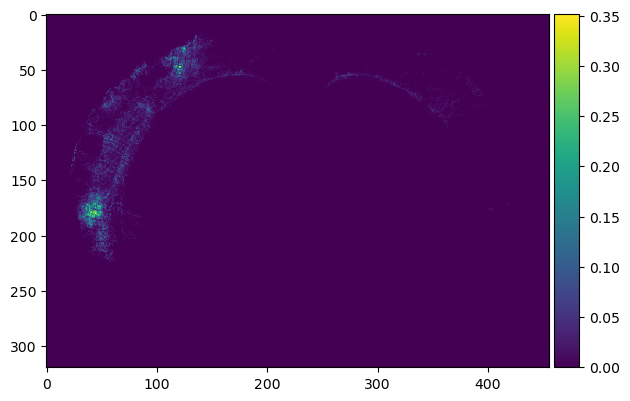

In [34]:
io.imshow(this_plane)

## Deprecated section

#### on group averages.npy

In [ ]:
#######
#finding contours

region_id= [943,962]
layer= '2/3'

# cannot be string to use isolate region2
region_mask= isolate_region_2(region_id)
# generate mask outside of the loop since it will be the same!

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.05it/s]


In [ ]:
# loop sections
regions=['s1', 's2']
mouse_lines=['ras','scn','tlx','sim1','rbp','ntsr']

In [104]:
for i in regions:
    for j in mouse_lines:
        file_path= f'D:\\viral_results\\{i}_averages\\{j}_average.npy'

        axons=np.load(file_path)
        axons[0,0,0]=0
        axons[0,1,0]=0
        
        axons_masked= axons*region_mask
        
        #threshold, outline=find_contour_fractionmax(axons_masked, 0.95)
        threshold, outline=find_contour_otsu(axons_masked)
        # find thresholded image and draw contours
        
        skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
        # save the contour image
        
        label_img = skimage.measure.label(threshold)
        region=skimage.measure.regionprops(label_img)
        # measure connected components
        
        temp= np.zeros_like(horizontal)
        # create empty array to plot the centoirds

        for k in region:
            AP_pix,ML_pix= k.centroid
            # extract coordinates for centroid

            AP_pix=int(AP_pix)
            ML_pix=int(ML_pix)

            temp[AP_pix,ML_pix]=1
            # plot the centroid for each connected component

            ML,AP= conv_stereo(ML_pix,AP_pix,25)
            # convert pixel values to seterotaxis coordinate
            print(f'centroid for {i} injection in {j} is ML= {ML}mm,AP= {AP}mm')
        
        skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)



C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_ras_s1.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_ras_s1_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s1 injection in ras is ML= 1.01mm,AP= 1.45mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_scn_s1.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_scn_s1_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s1 injection in scn is ML= 0.81mm,AP= 1.23mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_tlx_s1.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_tlx_s1_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s1 injection in tlx is ML= 0.91mm,AP= 1.05mm
centroid for s1 injection in tlx is ML= 0.84mm,AP= 1.15mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_sim1_s1.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_sim1_s1_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s1 injection in sim1 is ML= 0.91mm,AP= 1.03mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_rbp_s1.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_rbp_s1_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s1 injection in rbp is ML= 0.84mm,AP= 1.15mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_ntsr_s1.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_ntsr_s1_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s1 injection in ntsr is ML= 1.04mm,AP= 1.45mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_ras_s2.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_ras_s2_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s2 injection in ras is ML= 0.69mm,AP= 1.38mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_scn_s2.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_scn_s2_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s2 injection in scn is ML= 0.81mm,AP= 1.7mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_tlx_s2.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_tlx_s2_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s2 injection in tlx is ML= 0.86mm,AP= 1.3mm
centroid for s2 injection in tlx is ML= 0.74mm,AP= 1.33mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_sim1_s2.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_sim1_s2_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s2 injection in sim1 is ML= 1.04mm,AP= 1.58mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_rbp_s2.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_rbp_s2_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


centroid for s2 injection in rbp is ML= 0.94mm,AP= 1.4mm
centroid for s2 injection in rbp is ML= 0.86mm,AP= 1.78mm
centroid for s2 injection in ntsr is ML= 0.91mm,AP= 1.95mm
centroid for s2 injection in ntsr is ML= 0.99mm,AP= 0.85mm
centroid for s2 injection in ntsr is ML= 0.84mm,AP= -0.45mm


C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:15: UserWarning: 23_ntsr_s2.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_5384\721943737.py:39: UserWarning: 23_ntsr_s2_centroid.tiff is a low contrast image
  skimage.io.imsave(f'23_{j}_{i}_centroid.tiff', temp)


##### load average 315 horizontal sections from s1 and s2 samples then find contour

In [13]:
def find_contour_fractionmax2d(axon_array, fraction):
    
    ''' input axon stack as 2d numpy array (id, already in horizontal sum projection) and fraction of maximal intensity wish to compute (ie. 0.95)
    returns binary image and contour on horizontal sumprojection'''

    
    test1= skimage.filters.gaussian(axon_array, sigma=4)
    # apply gaussian filter

    #io.imshow(test1) 
    #io.show()
    # show sum projection in horizontal view
    
    contour1= np.max(test1) * fraction
    threshold1= test1>contour1
    # find 95% of max intensity and threshold

    #io.imshow(threshold1) 
    #io.show()
    
    outline= skimage.segmentation.find_boundaries(threshold1, mode='inner').astype(np.uint8)
    #find outline of the segmentation

    #io.imshow(outline) 
    #io.show()
    
    return threshold1, outline

In [7]:
s1=io.imread(r'M:\analysis\Yanqi_Liu\viral_image_analysis\viral_results\s1_s2\region\MO\MO_ AVG_s1_all_0.tif')
s2=io.imread(r'M:\analysis\Yanqi_Liu\viral_image_analysis\viral_results\s1_s2\region\MO\MO_ AVG_s2_all_0.tif')

In [14]:
fractionmax=0.95
thres1,outline1=find_contour_fractionmax2d(s1, fractionmax)
thres2,outline2=find_contour_fractionmax2d(s2, fractionmax)

In [15]:
site='s1'
outline=outline1
threshold=thres1

In [16]:
outline=outline.astype(np.int8)
# convert to 8 bit, for easier merge in image J since the centoid image next will be 8 bit
skimage.io.imsave(f'{site}_contour_{fractionmax}.tiff', outline)
# save the contour image

label_img = skimage.measure.label(threshold)
region=skimage.measure.regionprops(label_img)
# measure connected components

temp= np.zeros_like(s1)
# create empty array to plot the centoirds

for k in region:
    AP_pix,ML_pix= k.centroid
    # extract coordinates for centroid

    AP_pix=int(AP_pix)
    ML_pix=int(ML_pix)

    temp[AP_pix,ML_pix]=1
    # plot the centroid for each connected component

    ML,AP= conv_stereo(ML_pix,AP_pix,25)
    # convert pixel values to seterotaxis coordinate
    print(f'centroid for {site} injection is ML= {ML}mm,AP= {AP}mm')
    
temp=temp.astype(np.int8)
skimage.io.imsave(f'{site}_centroid_{fractionmax}.tiff', temp)


centroid for s1 injection is ML= 1.01mm,AP= 1.05mm


C:\Users\liu\AppData\Local\Temp\ipykernel_2052\2254015230.py:3: UserWarning: s1_contour_0.95.tiff is a low contrast image
  skimage.io.imsave(f'{site}_contour_{fractionmax}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_2052\2254015230.py:28: UserWarning: s1_centroid_0.95.tiff is a low contrast image
  skimage.io.imsave(f'{site}_centroid_{fractionmax}.tiff', temp)


In [17]:
site='s2'
outline=outline2
threshold=thres2

In [18]:
outline=outline.astype(np.int8)
# convert to 8 bit, for easier merge in image J since the centoid image next will be 8 bit
skimage.io.imsave(f'{site}_contour_{fractionmax}.tiff', outline)
# save the contour image

label_img = skimage.measure.label(threshold)
region=skimage.measure.regionprops(label_img)
# measure connected components

temp= np.zeros_like(s1)
# create empty array to plot the centoirds

for k in region:
    AP_pix,ML_pix= k.centroid
    # extract coordinates for centroid

    AP_pix=int(AP_pix)
    ML_pix=int(ML_pix)

    temp[AP_pix,ML_pix]=1
    # plot the centroid for each connected component

    ML,AP= conv_stereo(ML_pix,AP_pix,25)
    # convert pixel values to seterotaxis coordinate
    print(f'centroid for {site} injection is ML= {ML}mm,AP= {AP}mm')

    
temp=temp.astype(np.int8)
skimage.io.imsave(f'{site}_centroid_{fractionmax}.tiff', temp)

centroid for s2 injection is ML= 0.89mm,AP= 1.45mm


C:\Users\liu\AppData\Local\Temp\ipykernel_2052\2844885372.py:3: UserWarning: s2_contour_0.95.tiff is a low contrast image
  skimage.io.imsave(f'{site}_contour_{fractionmax}.tiff', outline)
C:\Users\liu\AppData\Local\Temp\ipykernel_2052\2844885372.py:29: UserWarning: s2_centroid_0.95.tiff is a low contrast image
  skimage.io.imsave(f'{site}_centroid_{fractionmax}.tiff', temp)


In [2]:
def save_tiff(numpystack, outname):
    
    '''save numpy stack as tiff'''
    
    print('Starting to saving tif files..')
    
    io.imsave(outname+'_axons.tif',numpystack)
    
    sum_0=np.sum(numpystack, axis=0)
    sum_1=np.sum(numpystack, axis=1)
    sum_2=np.sum(numpystack, axis=2)
    io.imsave(outname+ '_sum_0.tif',sum_0)
    io.imsave(outname+ '_sum_1.tif',sum_1)
    io.imsave(outname+ '_sum_2.tif',sum_2)

#### s1 sim1 samples

In [29]:
# s1 sim1 samples

name_list= ['AL207','AL209','AL273']

s1_sim1= np.zeros((320, 528, 456, len(name_list)))
# create big empty array to store the axons arrays, with the first 3 dimensions as horizontal allen atlas and last dimension as number of samples in this group

In [31]:
for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\s1\\{i}.npy')
    s1_sim1[:,:,:,count]=axon

loading AL207.npy
loading AL209.npy
loading AL273.npy


In [44]:
s1_sim1_avg= np.average(s1_sim1, axis=3)
s1_sim1_avg.shape

s1_sim1_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save('D:\\viral_results\\s1_s2\\s1_sim1_avg.npy', s1_sim1_avg)
# save this averaged array


In [48]:
# verify axons in plotly and then save as tiff stack & sum projections

s1_sim1_avg[0,0,0]=0
# dont forget to change the [0,0,0] position from the total number of axons back to 0!

s1_sim1_avg[0,1,0]=0
# dont forget to change the [0,1,0] position from the total number of samples in this group back to 0!

viewer.add_image(s1_sim1_avg)

save_tiff(s1_sim1_avg, 'D:\\viral_results\\s1_s2\\s1_sim1_avg')

Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_12116\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s1_sim1_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)
C:\Users\liu\AppData\Local\Temp\ipykernel_12116\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s1_sim1_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_12116\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s1_sim1_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_12116\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s1_sim1_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s2 sim1 samples

In [5]:
region='s2'
mouse_line= 'sim1'

name_list= ['AL281','AL286','AL321','AL322']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save('D:\\viral_results\\s1_s2\\s2_sim1_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL281.npy
loading AL286.npy
loading AL321.npy
loading AL322.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s2_sim1_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s2_sim1_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s2_sim1_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s2_sim1_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s1 rbp samples

In [7]:
region='s1'
mouse_line= 'rbp'

name_list= ['AL211','AL215','AL318']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL211.npy
loading AL215.npy
loading AL318.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s1_rbp data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s2 rbp samples

In [7]:
region='s2'
mouse_line= 'rbp'

name_list= ['AL288','AL326','AL327']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL211.npy
loading AL215.npy
loading AL318.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s1_rbp data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s1_rbp_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s1 tlx samples

In [10]:
region='s1'
mouse_line= 'tlx'

name_list= ['AL213','AL313','AL314']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL213.npy
loading AL313.npy
loading AL314.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s1_tlx_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s1_tlx data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s1_tlx_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s1_tlx_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s1_tlx_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s2 tlx samples

In [11]:
region='s2'
mouse_line= 'tlx'

name_list= ['AL278','AL280','AL319']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL278.npy
loading AL280.npy
loading AL319.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s2_tlx_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s2_tlx data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s2_tlx_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s2_tlx_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s2_tlx_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s1 ras samples

In [12]:
region='s1'
mouse_line= 'ras'

name_list= ['AL254','AL255','AL257']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL254.npy
loading AL255.npy
loading AL257.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s1_ras_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s1_ras data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s1_ras_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s1_ras_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s1_ras_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s2 ras samples 

In [4]:
region='s2'
mouse_line= 'ras'

name_list= ['AL303','AL332','AL333']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL303.npy
loading AL332.npy
loading AL333.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_7772\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s2_ras_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s2_ras data


C:\Users\liu\AppData\Local\Temp\ipykernel_7772\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s2_ras_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_7772\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s2_ras_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_7772\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s2_ras_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s1 scn sample

In [14]:
region='s1'
mouse_line= 'scn'

name_list= ['AL290','AL291','AL292','AL293']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL290.npy
loading AL291.npy
loading AL292.npy
loading AL293.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s1_scn_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s1_scn data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s1_scn_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s1_scn_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s1_scn_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s2 scn sample

In [16]:
region='s2'
mouse_line= 'scn'

name_list= ['AL290','AL292','AL323']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL290.npy
loading AL292.npy
loading AL323.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s2_scn_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s2_scn data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s2_scn_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s2_scn_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s2_scn_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s1 ntsr samples

In [17]:
region='s1'
mouse_line= 'ntsr'

name_list= ['AL274','AL285','AL311']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL274.npy
loading AL285.npy
loading AL311.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s1_ntsr_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s1_ntsr data


C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s1_ntsr_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s1_ntsr_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_17252\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s1_ntsr_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


#### s2 ntsr samples

In [3]:
region='s2'
mouse_line= 'ntsr'

name_list= ['AL274','AL310','AL330']

emptyarray= np.zeros((320, 528, 456, len(name_list)))

for count, i in enumerate (name_list):
    print (f'loading {i}.npy')
    axon= np.load (f'D:\\viral_results\\{region}\\{i}.npy')
    emptyarray[:,:,:,count]=axon
    
emptyarray_avg= np.average(emptyarray, axis=3)
emptyarray_avg.shape

emptyarray_avg[0,1,0]=len(name_list)
# store the number of samples used to calculate this average at the [0,1,0] location
# so that the value at [0,0,0] multiply by value at [0,1,0] equals the total number of axons for all samples in this group

np.save(f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg.npy', emptyarray_avg)
# save this averaged array

emptyarray_avg[0,0,0]=0
emptyarray_avg[0,1,0]=0

save_tiff(emptyarray_avg, f'D:\\viral_results\\s1_s2\\{region}_{mouse_line}_avg')

print(f'Done saving {region}_{mouse_line} data')

loading AL274.npy
loading AL310.npy
loading AL330.npy
Starting to saving tif files..


C:\Users\liu\AppData\Local\Temp\ipykernel_6316\828751201.py:7: UserWarning: D:\viral_results\s1_s2\s2_ntsr_avg_axons.tif is a low contrast image
  io.imsave(outname+'_axons.tif',numpystack)


Done saving s2_ntsr data


C:\Users\liu\AppData\Local\Temp\ipykernel_6316\828751201.py:12: UserWarning: D:\viral_results\s1_s2\s2_ntsr_avg_sum_0.tif is a low contrast image
  io.imsave(outname+ '_sum_0.tif',sum_0)
C:\Users\liu\AppData\Local\Temp\ipykernel_6316\828751201.py:13: UserWarning: D:\viral_results\s1_s2\s2_ntsr_avg_sum_1.tif is a low contrast image
  io.imsave(outname+ '_sum_1.tif',sum_1)
C:\Users\liu\AppData\Local\Temp\ipykernel_6316\828751201.py:14: UserWarning: D:\viral_results\s1_s2\s2_ntsr_avg_sum_2.tif is a low contrast image
  io.imsave(outname+ '_sum_2.tif',sum_2)


### section holder